In [2]:
import sys, os
import datetime
import time
import math
sys.path.append(os.path.join(os.getcwd(), '..'))

import talib
import numpy as np
import mplfinance as mpf
import pandas as pd

from lib.dao import event
from lib.dao.data_query import get_ohclv, get_all_pairs
from lib.utils.logger import logger
from lib.notification import send_push
from lib.dao.exchange import exchange, fetch_ticker, load_markets, fetch_ohlcv
from lib.utils.time import unify_dt, unify_ts, curr_ts, dt_to_float


In [2]:
all_pairs = list(filter(lambda pair: pair.endswith('USDT') and pair != 'NBTUSDT', get_all_pairs()))

2024-05-03 17:20:03,952 - INFO - Create an new database session


# 查询过去两天内出现MACD金叉的加密货币加密对


In [7]:
for pair in all_pairs:
    if pair == 'NBTUSDT':
        continue
    
    logger.info(f'Query {pair} in 100 days')
    df = get_ohclv(pair, '1d', limit=100)
    # print(f'==============={pair}================')
    df['macd'], df['macdSignal'], df['macdHist'] = talib.MACD(df['close'])
    if df['macdHist'].iloc[-2] < 0 and df['macdHist'].iloc[-1] >= 0:
        print(f'{pair} 在过去一天出现了金叉')
    if df['macdHist'].iloc[-3] < 0 and df['macdHist'].iloc[-2] >= 0:
        print(f'{pair} 在过去二天出现了金叉')
    # for i in range(len(df)):
    #     if df['macd'].iloc[i-1] < df['macdSignal'].iloc[i-1] and df['macd'].iloc[i] >= df['macdSignal'].iloc[i]:
    #         print(f"{pair} 金叉出现日: {df['timestamp'].iloc[i]}")
    # if df['macdHist'].iloc[-3] < df['macdHist'].iloc[-2] and df['macdHist'].iloc[-2] < df['macdHist'].iloc[-1]:
    #     print(f'{pair} 最近连续三天趋势增强')
    

BTT/USDT 在过去二天出现了金叉
CELR/USDT 在过去一天出现了金叉
USDSB/USDT 在过去一天出现了金叉
TOMO/USDT 在过去一天出现了金叉
RVN/USDT 在过去一天出现了金叉
GXS/USDT 在过去二天出现了金叉
LEND/USDT 在过去一天出现了金叉
JST/USDT 在过去二天出现了金叉
ALPHA/USDT 在过去二天出现了金叉
SXPDOWN/USDT 在过去二天出现了金叉
CTK/USDT 在过去二天出现了金叉
BCHDOWN/USDT 在过去二天出现了金叉
AKRO/USDT 在过去一天出现了金叉
DNT/USDT 在过去一天出现了金叉
AVA/USDT 在过去二天出现了金叉
AAVEDOWN/USDT 在过去二天出现了金叉
BTG/USDT 在过去二天出现了金叉
BURGER/USDT 在过去二天出现了金叉
TRIBE/USDT 在过去一天出现了金叉
OOKI/USDT 在过去二天出现了金叉
T/USDT 在过去一天出现了金叉
NEXO/USDT 在过去一天出现了金叉
HIFI/USDT 在过去一天出现了金叉
SUI/USDT 在过去一天出现了金叉
CYBER/USDT 在过去二天出现了金叉
VIC/USDT 在过去二天出现了金叉
STRK/USDT 在过去二天出现了金叉
ETHFI/USDT 在过去一天出现了金叉


# 监控自选加密货币出现SAR卖点的时刻

In [12]:
mypair = ['BTC/USDT', 'ETH/USDT', 'JTO/USDT', 'DOGE/USDT', 'CTXC/USDT', 'CHZ/USDT' ]
for pair in mypair:
    logger.info(f'Query {pair} in 100 days')
    df = get_ohclv(pair, '1d', limit=100)
    df['sar'] = talib.SAR(df['high'], df['low'], acceleration=0.02, maximum=0.2)
    # # 买入信号：当价格从下方穿过SAR线时
    df.loc[df['close'] > df['sar'], 'temp'] = 1
    # # 卖出信号：当价格从上方穿过SAR线时
    df.loc[df['close'] < df['sar'], 'temp'] = -1
    df['position'] = 0
    df.loc[df['temp'].shift(1) > df['temp'], 'position'] = -1
    df.loc[df['temp'].shift(1) < df['temp'], 'position'] = 1
    # 根据信号列计算仓位状态
    # df['position'] = df['signal'].diff()
    for i in range(1, len(df)):
        if df['position'].iloc[i] < 0:
            print(f'{pair} 在{df["timestamp"].iloc[i]} 出现卖点')

BTC/USDT 在2024-01-22 00:00:00 出现卖点
BTC/USDT 在2024-02-20 00:00:00 出现卖点
BTC/USDT 在2024-03-15 00:00:00 出现卖点
BTC/USDT 在2024-04-02 00:00:00 出现卖点
BTC/USDT 在2024-04-12 00:00:00 出现卖点
ETH/USDT 在2024-03-05 00:00:00 出现卖点
ETH/USDT 在2024-03-15 00:00:00 出现卖点
ETH/USDT 在2024-04-02 00:00:00 出现卖点
ETH/USDT 在2024-04-12 00:00:00 出现卖点
JTO/USDT 在2024-02-01 00:00:00 出现卖点
JTO/USDT 在2024-02-20 00:00:00 出现卖点
JTO/USDT 在2024-02-28 00:00:00 出现卖点
JTO/USDT 在2024-03-19 00:00:00 出现卖点
JTO/USDT 在2024-04-08 00:00:00 出现卖点
DOGE/USDT 在2024-01-23 00:00:00 出现卖点
DOGE/USDT 在2024-03-11 00:00:00 出现卖点
DOGE/USDT 在2024-04-02 00:00:00 出现卖点
CTXC/USDT 在2024-01-22 00:00:00 出现卖点
CTXC/USDT 在2024-02-12 00:00:00 出现卖点
CTXC/USDT 在2024-03-05 00:00:00 出现卖点
CTXC/USDT 在2024-03-13 00:00:00 出现卖点
CTXC/USDT 在2024-04-12 00:00:00 出现卖点
CHZ/USDT 在2024-01-31 00:00:00 出现卖点
CHZ/USDT 在2024-03-05 00:00:00 出现卖点
CHZ/USDT 在2024-03-17 00:00:00 出现卖点
CHZ/USDT 在2024-04-12 00:00:00 出现卖点


# 在过去150天内，MACD 金叉买入，SAR 卖点卖出的收益率

In [18]:
def macd_mix_sar_test(pair):
    pre_price = None
    init_usdt = curr_usdt = 100 # usdt
    curr_btc = 0
    pre_cost = 2 # usdt
    
    df = get_ohclv(pair, '1d', limit=300)
    # 找金叉点
    df['macd'], df['macdSignal'], df['macdHist'] = talib.MACD(df['close'])
    df['temp'] = np.nan
    df.loc[df['macdHist'] >= 0, 'temp'] = 1
    df.loc[df['macdHist'] < 0, 'temp'] = -1
    df.loc[df['temp'].shift(1) > df['temp'], 'macd_position'] = -1
    df.loc[df['temp'].shift(1) < df['temp'], 'macd_position'] = 1
    
    # 找SAR卖点
    # TODO: 第一个卖点应该忽略
    df['sar'] = talib.SAR(df['high'], df['low'], acceleration=0.02, maximum=0.2)
    df['temp'] = np.nan
    # # 买入信号：当价格从下方穿过SAR线时
    df.loc[df['close'] > df['sar'], 'temp'] = 1
    # # 卖出信号：当价格从上方穿过SAR线时
    df.loc[df['close'] < df['sar'], 'temp'] = -1
    df.loc[df['temp'].shift(1) > df['temp'], 'sar_position'] = -1
    df.loc[df['temp'].shift(1) < df['temp'], 'sar_position'] = 1
   
    for i in range(1, len(df)):
        if df['macd_position'].iloc[i] > 0 and curr_usdt > 0:
            curr_btc = curr_usdt / df['close'].iloc[i]
            pre_cost -= curr_usdt * 0.001
            pre_price = curr_usdt
            curr_usdt = 0
            print(f"{df['timestamp'].iloc[i]} 买入")
            continue
        if df['sar_position'].iloc[i] < 0 and curr_btc > 0:
            curr_usdt = curr_btc * df['close'].iloc[i]
            pre_cost -= (curr_btc * 0.001) * df['close'].iloc[i]
            curr_btc = 0
            rate = (curr_usdt - pre_price)/ pre_price * 100
            print(f"{df['timestamp'].iloc[i]} 卖出, 收益率: {rate}%")
            continue

    final_usdt = (curr_usdt if curr_usdt > 0 else curr_btc * df['close'].iloc[-1]) - (2 - pre_cost) + 2
    final_rate = (final_usdt - (init_usdt + 2)) / (init_usdt + 2) * 100
    print(f'截至最终USDT {final_usdt}， 收益率{final_rate}%')
    
    
    

In [19]:
mypair = ['TRB/USDT' ]
for pair in mypair:
    print(f'============{pair}===============')
    macd_mix_sar_test(pair)

============TRB/USDT===============
2023-09-26 00:00:00 买入
2023-11-02 00:00:00 卖出, 收益率: 121.5107445192099%
2023-11-06 00:00:00 买入
2023-11-09 00:00:00 卖出, 收益率: -18.009367681498823%
2023-12-08 00:00:00 买入
2023-12-31 00:00:00 卖出, 收益率: 115.10927743086529%
2024-01-30 00:00:00 买入
2024-02-22 00:00:00 卖出, 收益率: -4.13517873821855%
2024-03-02 00:00:00 买入
2024-03-19 00:00:00 卖出, 收益率: -33.836034012514034%
2024-03-25 00:00:00 买入
2024-05-16 00:00:00 卖出, 收益率: 17.088814001521907%
截至最终USDT 288.9221252294521， 收益率183.25698551907067%


## 如果1h内下跌超过10%的时候买入，最后涨到5%的时候卖出，要等多久

In [3]:
def buy_10_sell_5(pair, draw = False):
    pre_price = None
    init_usdt = curr_usdt = 100 # usdt
    curr_btc = 0
    pre_cost = 2 # usdt
    
    df = get_ohclv(pair, '1h', limit=500)
    # 找下跌10%的点
    buy_points = [np.nan] * len(df)
    sell_points = [np.nan] * len(df)
    df.loc[(df['high'] - df['close']) / df['high'] * 100 > 10, 'position'] = 1

    for i in range(1, len(df)):
        if df['position'].iloc[i] == 1 and curr_usdt > 0:
            # print(df.iloc[i])
            curr_btc = curr_usdt / df['close'].iloc[i]
            pre_cost -= curr_usdt * 0.001
            pre_price = curr_usdt
            curr_usdt = 0
            print(f"{df['timestamp'].iloc[i]} 买入")
            buy_points[i] = df['close'].iloc[i]
            continue
        if curr_btc > 0:
            if (df['close'].iloc[i] * curr_btc - pre_price) / pre_price * 100 > 5:
                # print(df.iloc[i])
                curr_usdt = curr_btc * df['close'].iloc[i]
                pre_cost -= (curr_btc * 0.001) * df['close'].iloc[i]
                curr_btc = 0
                rate = (curr_usdt - pre_price)/ pre_price * 100
                print(f"{df['timestamp'].iloc[i]} 卖出, 收益率: {rate}%")
                sell_points[i] = df['close'].iloc[i]
                continue
    if draw:
        addplot = []
        filter_out_nan = lambda x: x > 0
        if len(list(filter(filter_out_nan, buy_points))) > 0:
            addplot.append(mpf.make_addplot(buy_points, type='scatter', markersize=100, color='y'))
        if len(list(filter(filter_out_nan, sell_points))) > 0:
            addplot.append(mpf.make_addplot(sell_points, type='scatter', markersize=100, color='black'))
        mpf.plot(df.set_index('timestamp'), type='candle', style='yahoo',
             title=f'{pair} Chart', ylabel='Price', ylabel_lower='MACD',
             addplot=addplot,
             figscale=1.5, figsize=(16, 10))
    
    final_usdt = (curr_usdt if curr_usdt > 0 else curr_btc * df['close'].iloc[-1]) - (2 - pre_cost) + 2
    final_rate = (final_usdt - (init_usdt + 2)) / (init_usdt + 2) * 100
    result = {'msg': f'截至最终USDT {final_usdt}， 收益率{final_rate}%', 'rate': final_rate }
    # print(result['msg'])
    return result

In [13]:
results = {}
for pair in all_pairs:
    print(f'============{pair}===============')
    results[pair] = buy_10_sell_5(pair, True)

NameError: name 'all_pairs' is not defined

In [ ]:
good = list(filter(lambda x: results[x]['rate'] > 0, results))
bad = list(filter(lambda x: results[x]['rate'] < 0, results))
ok = list(filter(lambda x: results[x]['rate'] == 0, results))
print(len(good), len(bad), len(ok))

In [ ]:
# for pair in bad:
#     buy_10_sell_5(pair, True)

# 获得币对的市值，怀疑这些垃圾币的市值低
# However，市值算不了，没有流通量数据,所以改成查看这些垃圾币发行时间是否比较少，连500都没有
# from lib.dao.exchange import exchange
def get_age(pair):
    return len(get_ohclv(pair, '1d', limit=500))
def less_500_rate(group):
    count_less_500 = 0
    for pair in group:
        age = get_age(pair)
        if age < 500:
            count_less_500 += 1
        # print(f'{pair}: {age}')
    print(f'rate {count_less_500 / len(group) * 100}%')

print(less_500_rate(bad))
print(less_500_rate(good))
print(less_500_rate(ok))

# 找到过去10min内跌幅最大的币对，交易一下

In [4]:
scale = 10
while True:
    curr_time = unify_dt(datetime.datetime.now(), scale * 60)
    messages_10 = []
    messages_5 = []
    decline_rates = []
    for pair in all_pairs:
        df = get_ohclv(pair, '1m', limit=scale + 1)
        
        # for i in range(len(df)):
        max_high = max(df['high'])
        high_idx = 0
        for i in range(len(df)):
            if df['high'].iloc[i] == max_high:
                high_idx = i
                break
    
        data_after_high = df[high_idx:]
        min_low = min(data_after_high['low'])
        min_idx = 0
        for i in range(len(data_after_high)):
            if data_after_high['low'].iloc[i] == min_low:
                min_idx = i
    
        decline_rate = (max_high - min_low) / max_high * 100
        decline_rates.append([pair, decline_rate])
        
        if decline_rate > 10:
            messages_10.append(f'{pair} decline over 10% in {scale}min: {round(decline_rate, 2)}%')
        elif decline_rate > 5:
            messages_5.append(f'{pair} decline over 5% in {scale}min: {round(decline_rate, 2)}%')

    df = pd.DataFrame(decline_rates, columns = ['pair', 'decline_rate'])
    df.sort_values(by='decline_rate', ascending=False, inplace=True)
    print('过去10分钟跌幅前3的交易对: ')
    print(df.head(3))
 
    if len(messages_10) + len(messages_5) > 0:
        messages = messages_10 + messages_5
        print('Send push message:', '\n'.join(messages))
        result = send_push({ 'content': '\n'.join(messages), 'title': f'过去{scale}分钟行情' })
        if not result['success']:
            print('send push failed')

    while unify_dt(datetime.datetime.now(), scale * 60) == curr_time:
        time.sleep(5)

    logger.info('Start next check loop')
    

2024-05-02 09:37:03,823 - INFO - Create an new database session


过去10分钟跌幅前3的交易对: 
          pair  decline_rate
247   VGX/USDT      4.589114
284   REI/USDT      3.924765
281  BIFI/USDT      2.969502


2024-05-02 09:40:02,535 - INFO - Start next check loop


过去10分钟跌幅前3的交易对: 
              pair  decline_rate
247       VGX/USDT      4.180064
550  XVS/USDT:USDT      3.262847
284       REI/USDT      3.257576


KeyboardInterrupt: 

# 海龟交易法测试


In [10]:


def decline_rate(prev, after) -> float:
    return ( after - prev ) / prev * 100

def is_up_over(prev, after, rate) -> bool:
    if rate == None:
        return False
    if prev == 0:
        return False
    return after > prev and abs(decline_rate(after, prev)) > rate

def is_decline_over(prev, after, rate) -> bool:
    if rate == None:
        return False
    if prev == 0:
        return False
    return after < prev and abs(decline_rate(after, prev)) > rate

def usdt_2_coin(usdt, price, cost_rate = 0):
    return (usdt - (usdt * cost_rate)) / price

def coin_2_usdt(coin, price, cost_rate = 0):
    return (coin - (coin * cost_rate)) * price
    
def turtle_trade(
    pair, 
    frame = '1d', 
    limit = 500, 
    max_round = 1, 
    min_window = None, 
    max_window = None, 
    total_money = 100.0,
    is_rolling = True,
    buy_if_decline = False,
    buy_if_decline_over = 10,
    stop_up_rate = None, # 止盈率
    stop_decline_rate = None,  #止损率
    graph_name = None
): # 返回收益率
    if min_window and max_window and limit <= max(min_window, max_window):
        raise Exception(f'Error, days should be at grater than {max(min_window, max_window)}')

    title = f'{pair} {graph_name if graph_name else ""} Chart'
    print(title)
    
    df = get_ohclv(pair, frame, limit=limit)
    # if max_window:
    df['max_in_window'] = df['close'].rolling(window=max_window or 20).max()
    # if min_window:
    df['min_in_window'] = df['close'].rolling(window=min_window or 20).min()
    df['money'] = total_money
    buy_point = [np.nan] * len(df)
    sell_point = [np.nan] * len(df)

    def is_buy(): # bool
        is_over_max_window = context["max_window"] and context["curr_price"] > context["max_in_past_window"]
        is_decline_over_threshold = context["buy_if_decline"] and is_decline_over(context["max_in_past_window"], context["curr_price"], context["buy_if_decline_over"])
        result = (is_over_max_window or is_decline_over_threshold) and context["use_money"] > 0
        if result:
            message = '买入原因：'
            if is_over_max_window: 
                message += "涨破窗口"
            else:
                message += "达到最大跌幅"
            print(message)
        return result
    def buy():
        # 手头上用来交易的钱
        # print(context)
        context["use_money"] = context["total_money"] if context["is_rolling"] else context["use_money"]
        buy_per_round = context["use_money"] / (context["max_round"] - context["round_number"])
        context["round_number"] += 1
        
        spend_money = 0
        if context["use_money"] > buy_per_round:
            spend_money = buy_per_round
            context["use_money"] -= buy_per_round
        else:
            spend_money = context["use_money"] 
            context["use_money"] = 0

        context["total_money"] -= spend_money
        context["hold_coin"] += usdt_2_coin(spend_money, context["curr_price"], context["cost_rate"])
        
        if context["latest_max_price"] == 0:
            context["latest_max_price"] = context["curr_price"]
        context["latest_buy_price"] = context["curr_price"]
        print(f'买入价格: {round(context["curr_price"], 4)}, 花费 {round(spend_money, 4)}, 剩余: {round(context["total_money"], 4)}')
        
    def is_sell():
        is_over_min_window = context["min_window"] and context["curr_price"] < context["min_in_past_window"]
        is_decline_over_threshold = is_decline_over(context["latest_max_price"], context["curr_price"], context["stop_decline_rate"])
        is_up_over_threshold = is_up_over(context["latest_buy_price"], context["curr_price"], context["stop_up_rate"])
        
        result = context["hold_coin"] > 0 and (is_over_min_window or is_decline_over_threshold or is_up_over_threshold)
        if result:
            message = f'卖出价格: {context["curr_price"]}, 原因：'
            if is_over_min_window: 
                message += "跌破最低价"
            elif is_up_over_threshold:
                message += "达到期望收益"
            else:
                message += "达到最大回撤"
            print(message)
        return result

    def sell():
        # print(context)
        gain = coin_2_usdt(context["hold_coin"], context["curr_price"], context["cost_rate"])
        context["total_money"] += gain
        context["use_money"] = context["total_money"] if context["is_rolling"] else gain
        context["hold_coin"] = 0
        context["round_number"] = 0
        context["latest_max_price"] = 0
        context["latest_buy_price"] = 0
    
    cost_rate = 0.001
    context = {
        # input_param
        "max_round": max_round,
        "min_window": min_window, 
        "max_window": max_window, 
        "stop_up_rate": stop_up_rate,
        "stop_decline_rate": stop_decline_rate,
        "cost_rate": cost_rate,
        "init_coin": usdt_2_coin(total_money, df['close'].iloc[0], cost_rate), #初始投入的钱相当于多少币
        "init_money": total_money, #初始投入的钱
        "is_rolling": is_rolling, # 盈利的钱是否继续投入
        "buy_if_decline": buy_if_decline,
        "buy_if_decline_over": buy_if_decline_over,

        # dynamic param
        "idx": 0,
        "max_in_past_window": 0,
        "min_in_past_window": 0,
        "curr_price": df['close'].iloc[0],
        # 买入卖出时变化的参数
        "hold_coin": 0,
        "use_money": total_money, # 最多买入的钱
        "total_money": total_money, #目前为止手头上的钱，包括盈利的和亏损的
        "round_number": 0,
        # 买入期间变化
        "latest_max_price": 0, #买入期间最大的价格
        "latest_buy_price": 0, #最近一次买入价格
    }

    for i in range(0, len(df)):
        df.loc[i, 'compare'] = coin_2_usdt(context["init_coin"], df['close'].iloc[i])
        context["max_in_past_window"] = df['max_in_window'].iloc[i-1]
        context["min_in_past_window"] = df['min_in_window'].iloc[i-1]
        context["curr_price"] = df['close'].iloc[i]
        context["idx"] = i
        if context["latest_max_price"] > 0 and context["curr_price"] > context["latest_max_price"]:
            context["latest_max_price"] = context["curr_price"]
    
        if i < max(min_window or 20, max_window or 20):
            continue
            
        if is_buy():
            buy()
            buy_point[i] = context["curr_price"]
            
        elif is_sell():
            sell()
            sell_point[i] = context["curr_price"]

        df.loc[i, 'money'] = context["total_money"] + context["hold_coin"] * context["curr_price"]

    add_plot = [
        mpf.make_addplot(df['compare'], color='black', panel=1, secondary_y=False),
        mpf.make_addplot(df['money'], color='blue', panel=1, secondary_y=False)
    ]
    if not np.all(np.isnan(buy_point)):
        add_plot.append(mpf.make_addplot(buy_point, type='scatter', markersize=50, color='red', panel=0))
    if not np.all(np.isnan(sell_point)):
        add_plot.append(mpf.make_addplot(sell_point, type='scatter', markersize=100, color='green', panel=0))
    print("最终收益率", round((df['money'].iloc[-1] - df['money'].iloc[0]) / df['money'].iloc[0] * 100, 4), "%")
    mpf.plot(df.set_index('timestamp'), type='candle', style='yahoo',
             title=title, ylabel='Price',
             addplot=add_plot,
             figscale=1.5, figsize=(16, 10))
    

TRB/USDT Case: Sell if max decline/up 10% and buy with 2 round Chart
买入原因：涨破窗口
买入价格: 110.1, 花费 50.0, 剩余: 50.0
买入原因：涨破窗口
买入价格: 110.26, 花费 50.0, 剩余: 0.0
卖出价格: 109.31, 原因：跌破最低价
买入原因：涨破窗口
买入价格: 109.48, 花费 49.5061, 剩余: 49.5061
买入原因：涨破窗口
买入价格: 109.61, 花费 49.5061, 剩余: 0.0
卖出价格: 109.73, 原因：跌破最低价
买入原因：涨破窗口
买入价格: 110.74, 花费 49.4906, 剩余: 49.4906
买入原因：涨破窗口
买入价格: 111.37, 花费 49.4906, 剩余: 0.0
卖出价格: 110.29, 原因：跌破最低价
买入原因：涨破窗口
买入价格: 108.95, 花费 49.0518, 剩余: 49.0518
卖出价格: 107.75, 原因：跌破最低价
最终收益率 -2.5337 %


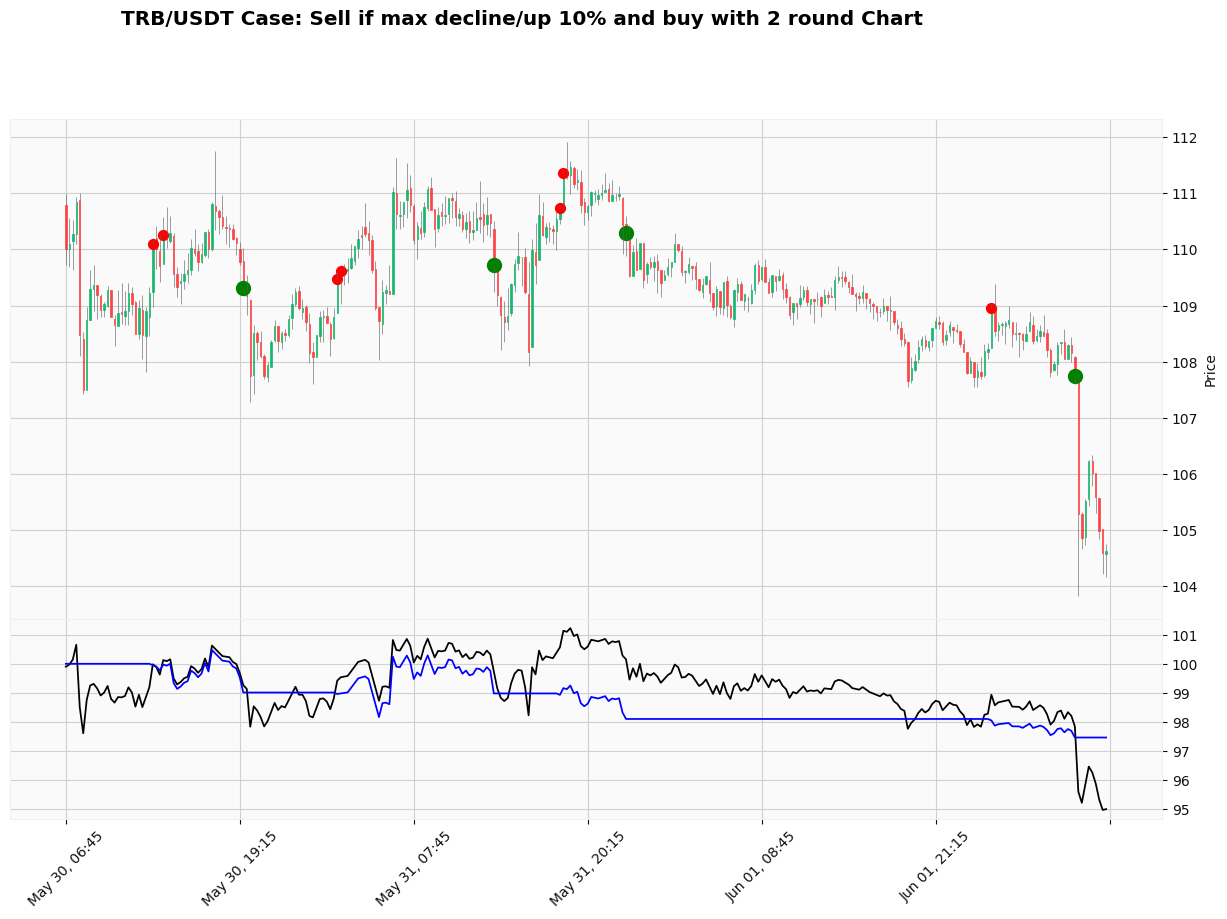

In [20]:
MONITOR_LIST=[
    'TRB/USDT',
]
for pair in MONITOR_LIST:
    # turtle_trade(pair, '1h', 168)
    # turtle_trade(pair, '1h', 168, min_window=10, graph_name='Case: decline window is 10')
    # turtle_trade(pair, '1h', 168, stop_decline_rate = 10, graph_name='Case: Sell if max decline 10%')
    # turtle_trade(pair, '1h', 168, min_window=20, stop_decline_rate = 10, max_round = 2, graph_name='Case: Sell if max decline 10% and buy with 2 round')
    turtle_trade(
        pair, 
        '15m', 
        300, 
        min_window=20, 
        max_window=20,
        # stop_up_rate=10,
        stop_decline_rate = 10, 
        # buy_if_decline = True,
        # buy_if_decline_over = 5,
        max_round = 2, 
        graph_name='Case: Sell if max decline/up 10% and buy with 2 round'
    )

TRB/USDT  Chart
买入价格: 117.2, 花费 100.0, 剩余: 0
卖出价格: 125.23 原因：Over Min Window
买入价格: 126.59, 花费 106.6379, 剩余: 0
卖出价格: 131.11 原因：Over Min Window
买入价格: 142.98, 花费 110.2248, 剩余: 0
卖出价格: 127.38 原因：Over Min Window
买入价格: 109.37, 花费 98.0023, 剩余: 0
卖出价格: 106.94 原因：Over Min Window
买入价格: 109.51, 花费 95.6333, 剩余: 0
卖出价格: 106.52 原因：Over Min Window
买入价格: 114.04, 花费 92.8362, 剩余: 0
卖出价格: 115.6 原因：Over Min Window
买入价格: 117.86, 花费 93.918, 剩余: 0
卖出价格: 114.61 原因：Over Min Window
最终收益率 -8.8543 %


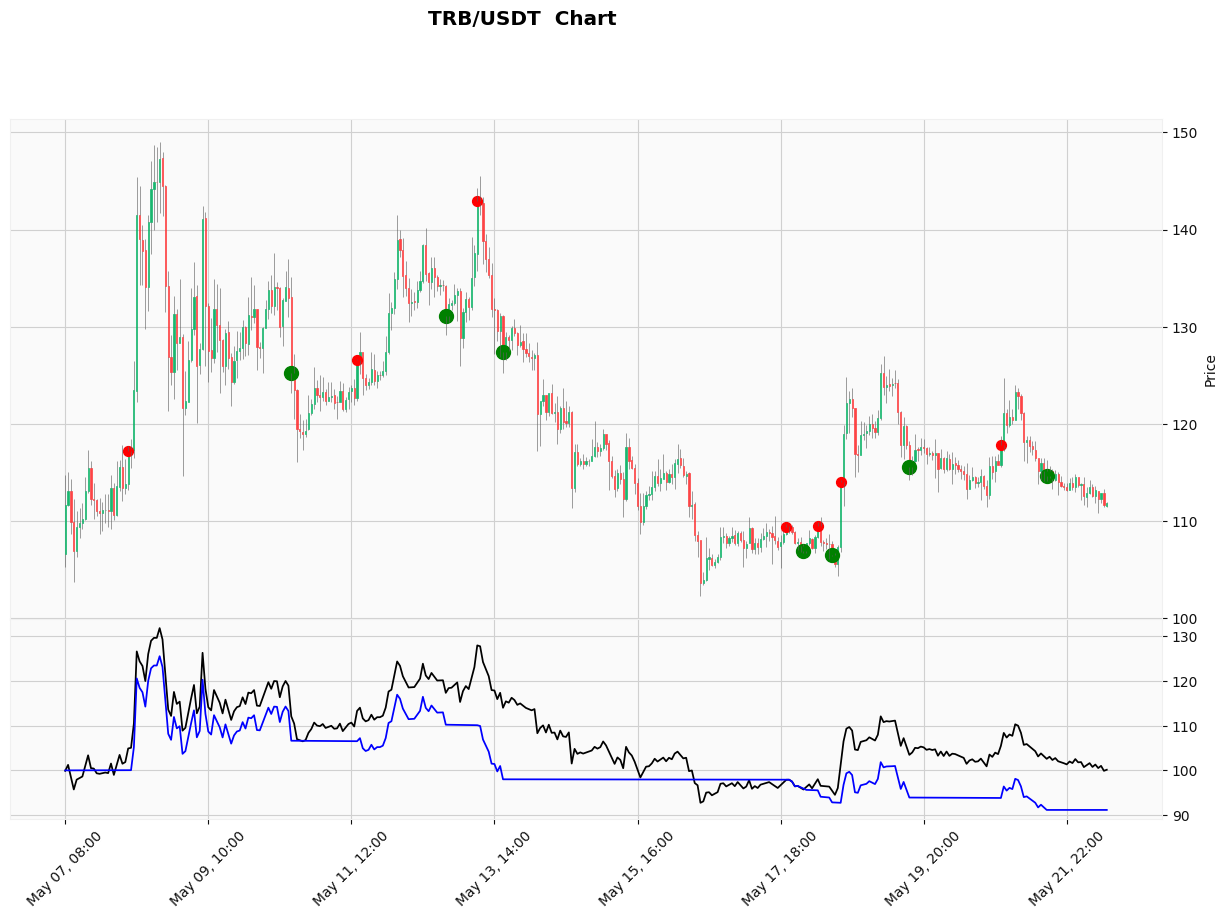

TRB/USDT Case: decline window is 10 Chart
买入价格: 117.2, 花费 100.0, 剩余: 0
卖出价格: 126.93 原因：Over Min Window
买入价格: 131.85, 花费 108.0856, 剩余: 0
卖出价格: 125.23 原因：Over Min Window
买入价格: 126.59, 花费 102.4535, 剩余: 0
卖出价格: 131.11 原因：Over Min Window
买入价格: 142.98, 花费 105.8996, 剩余: 0
卖出价格: 131.7 原因：Over Min Window
买入价格: 109.37, 花费 97.3499, 剩余: 0
卖出价格: 106.94 原因：Over Min Window
买入价格: 109.51, 花费 94.9967, 剩余: 0
卖出价格: 106.52 原因：Over Min Window
买入价格: 114.04, 花费 92.2183, 剩余: 0
卖出价格: 117.85 原因：Over Min Window
买入价格: 117.86, 花费 95.1087, 剩余: 0
卖出价格: 117.69 原因：Over Min Window
最终收益率 -5.2183 %


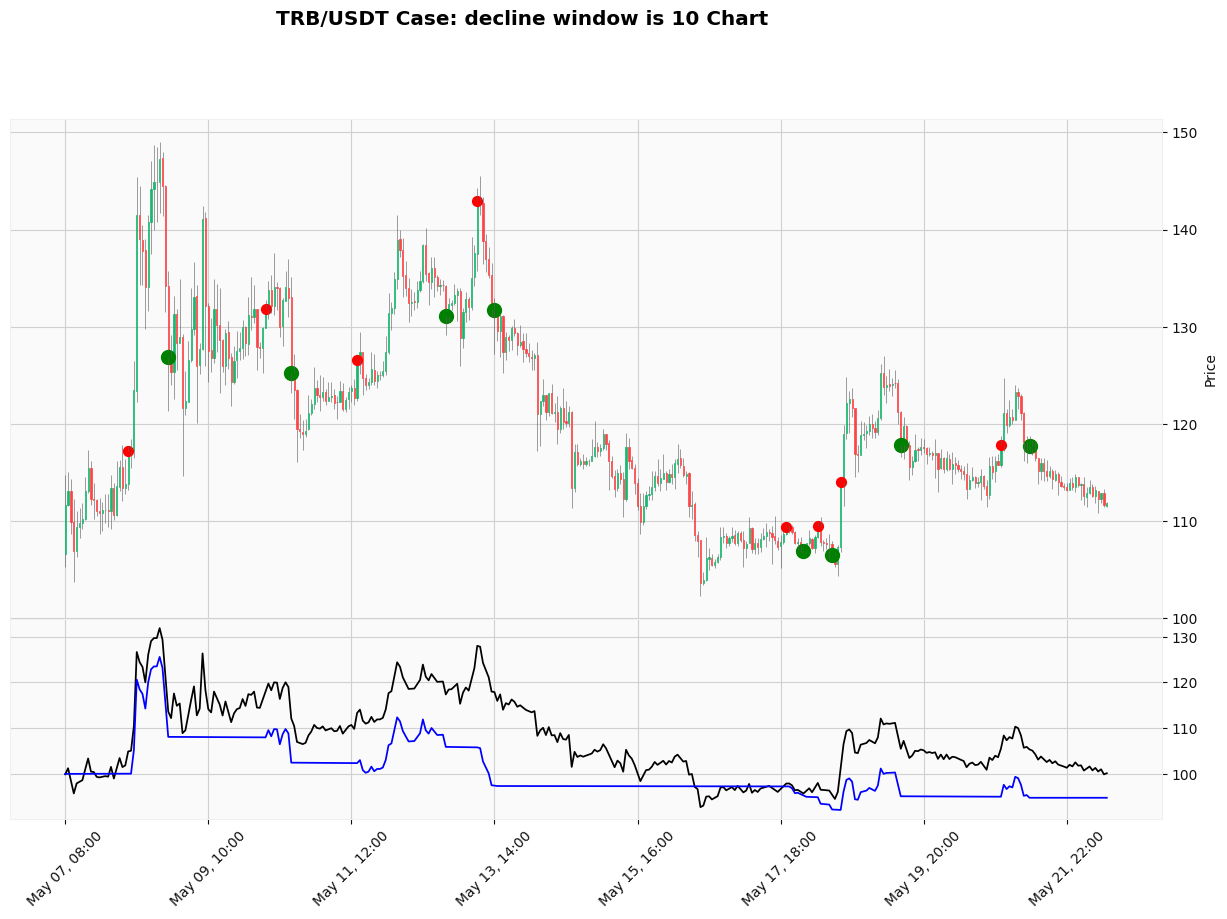

TRB/USDT Case: Sell if max decline 10% Chart
买入价格: 117.2, 花费 100.0, 剩余: 0
卖出价格: 126.93 原因：Over max threshold from 147.3 to 126.93 with decline rate -13.8289%
买入价格: 131.85, 花费 108.0856, 剩余: 0
卖出价格: 125.23 原因：Over Min Window
买入价格: 126.59, 花费 102.4535, 剩余: 0
卖出价格: 131.11 原因：Over Min Window
买入价格: 142.98, 花费 105.8996, 剩余: 0
卖出价格: 127.38 原因：Over Min Window
买入价格: 109.37, 花费 94.1567, 剩余: 0
卖出价格: 106.94 原因：Over Min Window
买入价格: 109.51, 花费 91.8807, 剩余: 0
卖出价格: 106.52 原因：Over Min Window
买入价格: 114.04, 花费 89.1934, 剩余: 0
卖出价格: 115.6 原因：Over Min Window
买入价格: 117.86, 花费 90.2327, 剩余: 0
卖出价格: 114.61 原因：Over Min Window
最终收益率 -12.4308 %


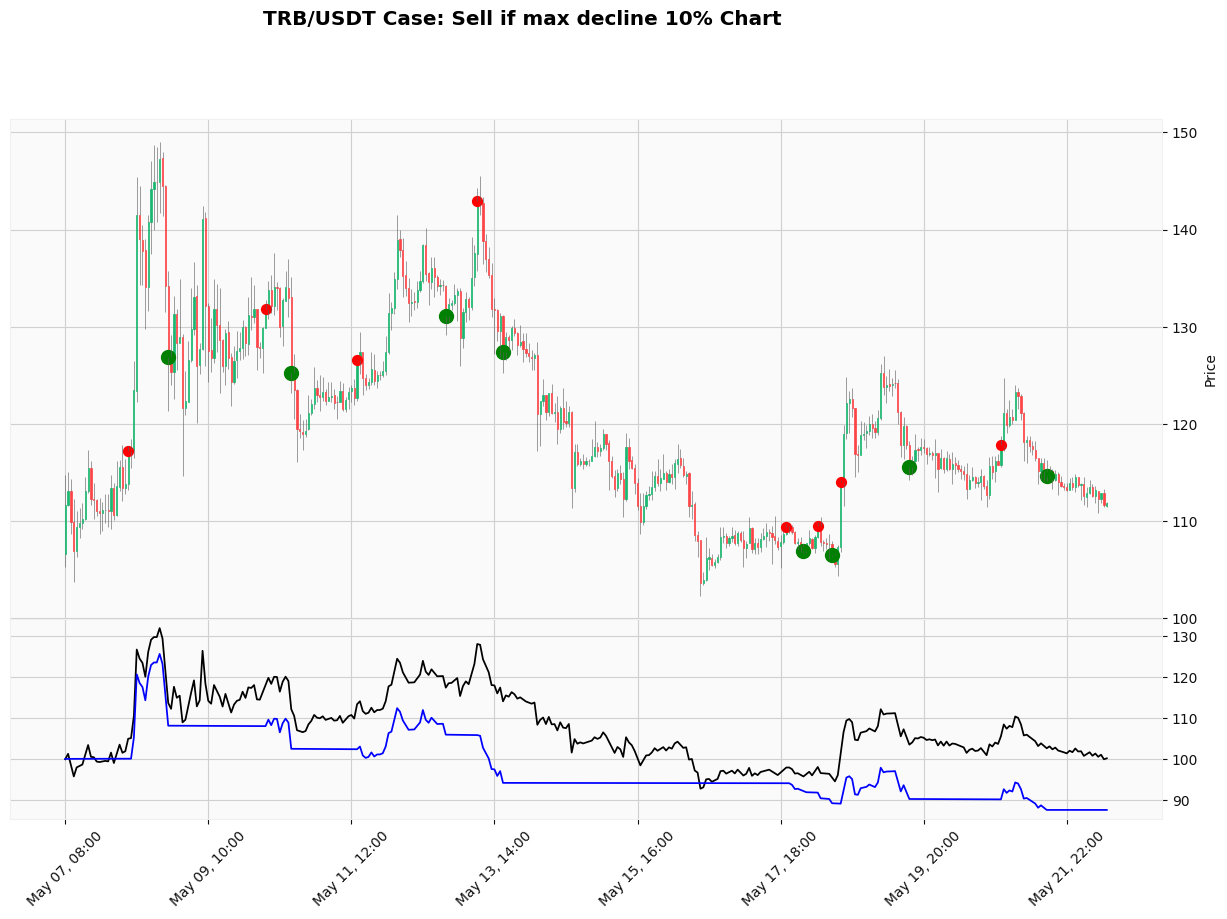

TRB/USDT Case: Sell if max decline 10% and buy with 2 round Chart
买入价格: 117.2, 花费 50.0, 剩余: 50.0
买入价格: 117.37, 花费 50.0, 剩余: 0
卖出价格: 126.93 原因：Over max threshold from 147.3 to 126.93 with decline rate -13.8289%
买入价格: 131.85, 花费 54.0036, 剩余: 54.0036
买入价格: 133.78, 花费 54.0036, 剩余: 0
卖出价格: 125.23 原因：Over Min Window
买入价格: 126.59, 花费 50.8204, 剩余: 50.8204
买入价格: 127.4, 花费 50.8204, 剩余: 0
卖出价格: 131.11 原因：Over Min Window
买入价格: 142.98, 花费 52.3628, 剩余: 52.3628
卖出价格: 127.38 原因：Over Min Window
买入价格: 109.37, 花费 49.4596, 剩余: 49.4596
买入价格: 109.38, 花费 49.4596, 剩余: 0
卖出价格: 106.94 原因：Over Min Window
买入价格: 109.51, 花费 48.2618, 剩余: 48.2618
卖出价格: 106.52 原因：Over Min Window
买入价格: 114.04, 花费 47.5561, 剩余: 47.5561
买入价格: 118.97, 花费 47.5561, 剩余: 0
卖出价格: 115.6 原因：Over Min Window
买入价格: 117.86, 花费 47.1134, 剩余: 47.1134
买入价格: 121.09, 花费 47.1134, 剩余: 0
卖出价格: 114.61 原因：Over Min Window
最终收益率 -9.7743 %


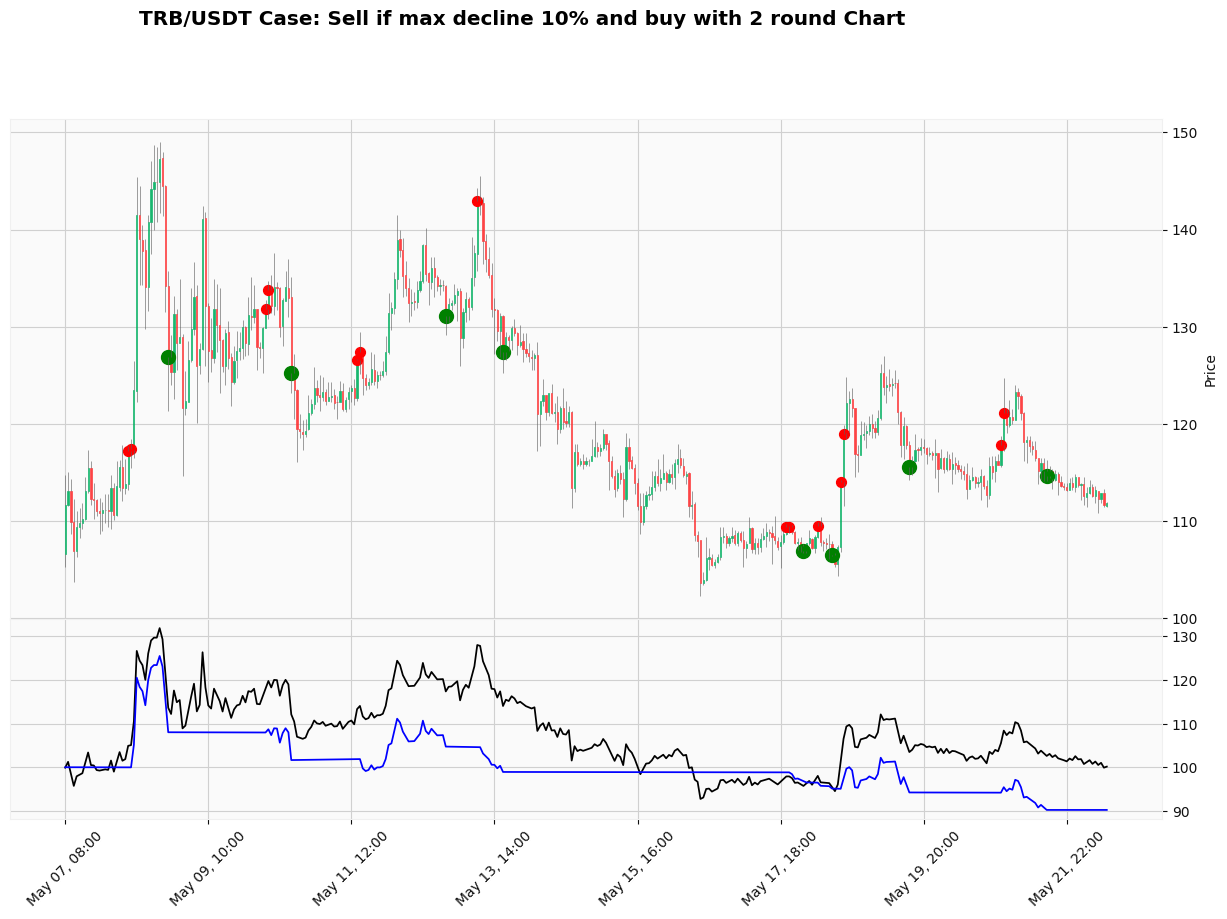

In [5]:
MONITOR_LIST=[
    'BTC/USDT',
    'ETH/USDT',
    'SOL/USDT',
    'DOGE/USDT',
    'TRB/USDT'
]
for pair in MONITOR_LIST:
    turtle_trade(pair, '1d', 365)
    turtle_trade(pair, '1d', 365, min_window=10, graph_name='Case: decline window is 10')
    turtle_trade(pair, '1d', 365, stop_decline_rate = 10, graph_name='Case: Sell if max decline 10%')
    turtle_trade(pair, '1d', 365, min_window=20, stop_decline_rate = 10, max_round = 2, graph_name='Case: Sell if max decline 10% and buy with 2 round')

DODO总是爆拉一波，然后开始跌，策略入场之时就是下跌或暴跌之时，然后因为暴跌就割肉，导致前面出现梯形下降

这个策略，遇到好的行情，会跟进，遇到不好的行情，会及时杀掉，对于那些稳定的币可以采用，长期下跌趋势可以防止损失太大，偶尔涨偶尔跌能够稳住，就怕来个大砸盘。

看起来，某些庄家喜欢等涨20天之后等海龟韭菜们入场来暴跌一波，如果我跌幅的窗口设置小一点，设置成10天呢？-> 相当于沉不住气，容易在一些大震荡行情失利。

这侧策略是否应该设置成下跌到百分之多少就马上割肉？防止大割。 

总结：大好行情，简单海龟交易策略好，割韭菜行情还是要止损

感觉如果涨的太猛也不能入场，因为可能是庄家在爆拉，入场就下跌割肉。

如果觉得自己是在高位买入的话，可以设置一下最大回撤，这样可以追高买入，同时如果遇到大跌可以及时撤回，如果行情继续下跌，就不会蒙受损失。就怕它回涨的幅度和你的最大回撤相同。

轮数设置在2就差不多，设太多容易出现太多的仓位布置在高位。

# 探索高波动币种短线交易策略

MACD + SAR + BOLL信号，并画图检测多币种的形态和挖掘不同币种的策略


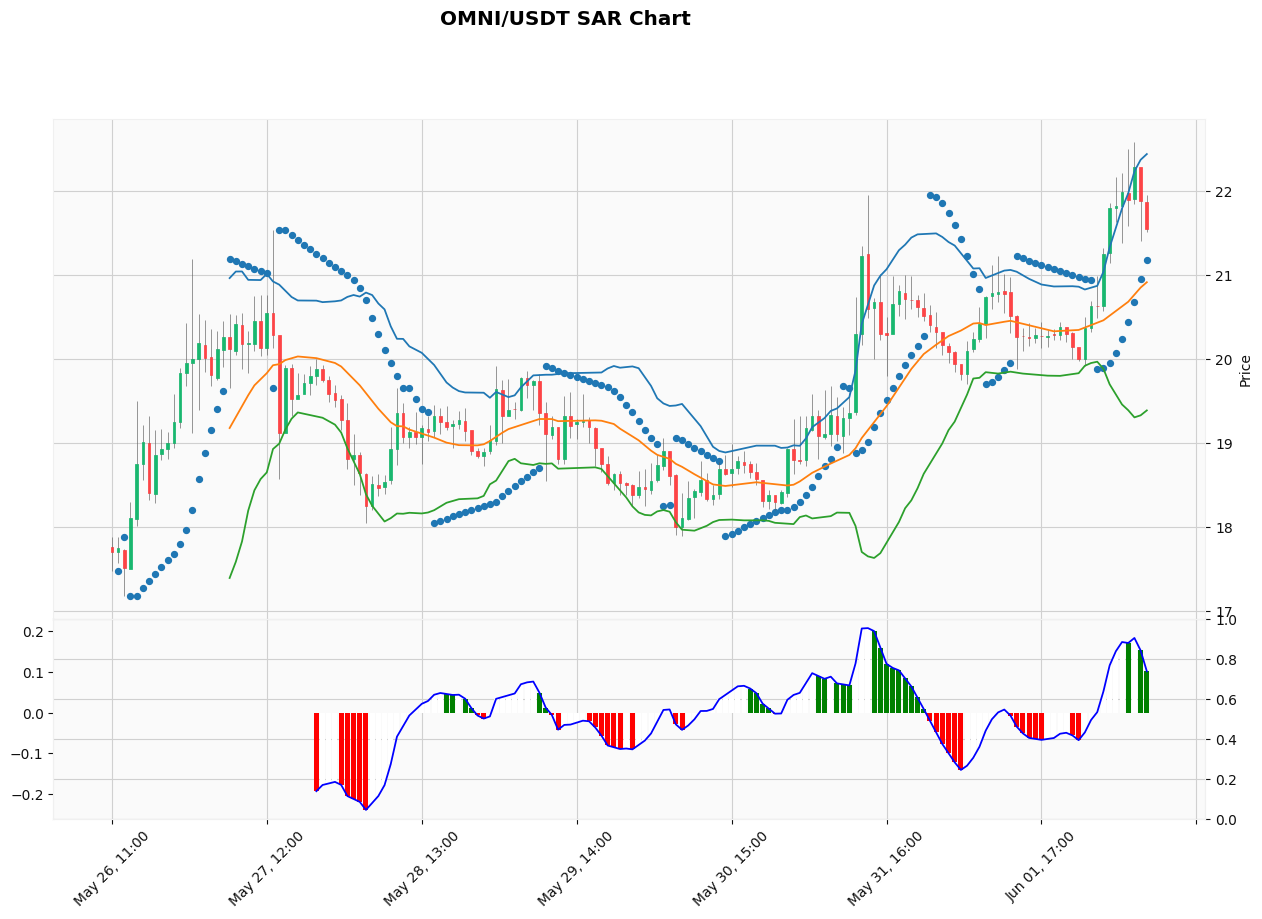

In [49]:
symbol = 'OMNI/USDT'

df = get_ohclv(symbol, '1h', 168)

df['macd'], df['macdSignal'], df['macdHist'] = talib.MACD(df['close'])
df['upperband'], df['middleband'], df['lowerband'] = talib.BBANDS(df['close'], timeperiod=20)
df['sar'] = talib.SAR(df['high'], df['low'], acceleration=0.02, maximum=0.2)

mpf.plot(df.set_index('timestamp'), type='candle', style='yahoo',
         title=f'{symbol} SAR Chart', ylabel='Price', ylabel_lower='MACD',
         addplot=[
             mpf.make_addplot(df['macdHist'], panel=1, color='b', secondary_y=True),
             mpf.make_addplot(df['macdHist'].where(df['macdHist'] >= 0 ), type='bar', panel=1, color='g', alpha=1, secondary_y=True),
             mpf.make_addplot(df['macdHist'].where(df['macdHist'] < 0 ), type='bar', panel=1, color='r', alpha=1, secondary_y=True),
             mpf.make_addplot(df['macdHist'].where(df['macdHist'].shift(1) < df['macdHist']), type='bar', panel=1, color='w', alpha=1, secondary_y=True),
             mpf.make_addplot(df[['upperband', 'middleband', 'lowerband']]),
             mpf.make_addplot(df['sar'], type='scatter'),
         ],
         figscale=1.5, figsize=(16, 10))

In [32]:
df[50:]

,timestamp,open,high,low,close,volume,macd,macdSignal,macdHist
50,2024-05-29 06:00:00,0.16889,0.17042,0.16838,0.16856,86336806.0,0.000703,0.000123,0.000580
51,2024-05-29 07:00:00,0.16857,0.16872,0.16651,0.16685,61785001.0,0.000608,0.000220,0.000388
52,2024-05-29 08:00:00,0.16685,0.16719,0.16418,0.16538,107937864.0,0.000409,0.000258,0.000151
53,2024-05-29 09:00:00,0.16539,0.16570,0.16394,0.16444,56982864.0,0.000174,0.000241,-0.000067
54,2024-05-29 10:00:00,0.16443,0.16600,0.16411,0.16575,41377440.0,0.000092,0.000211,-0.000119
...,...,...,...,...,...,...,...,...,...
145,2024-06-02 05:00:00,0.16005,0.16040,0.15930,0.15961,15832913.0,0.000086,0.000211,-0.000125
146,2024-06-02 06:00:00,0.15960,0.16024,0.15934,0.16014,17099979.0,0.000069,0.000183,-0.000114
147,2024-06-02 07:00:00,0.16013,0.16019,0.15863,0.15871,19453540.0,-0.000060,0.000134,-0.000194
148,2024-06-02 08:00:00,0.15871,0.15937,0.15850,0.15887,24646653.0,-0.000147,0.000078,-0.000225


In [21]:
df = get_ohclv('DOGE/USDT', '1d', 150)

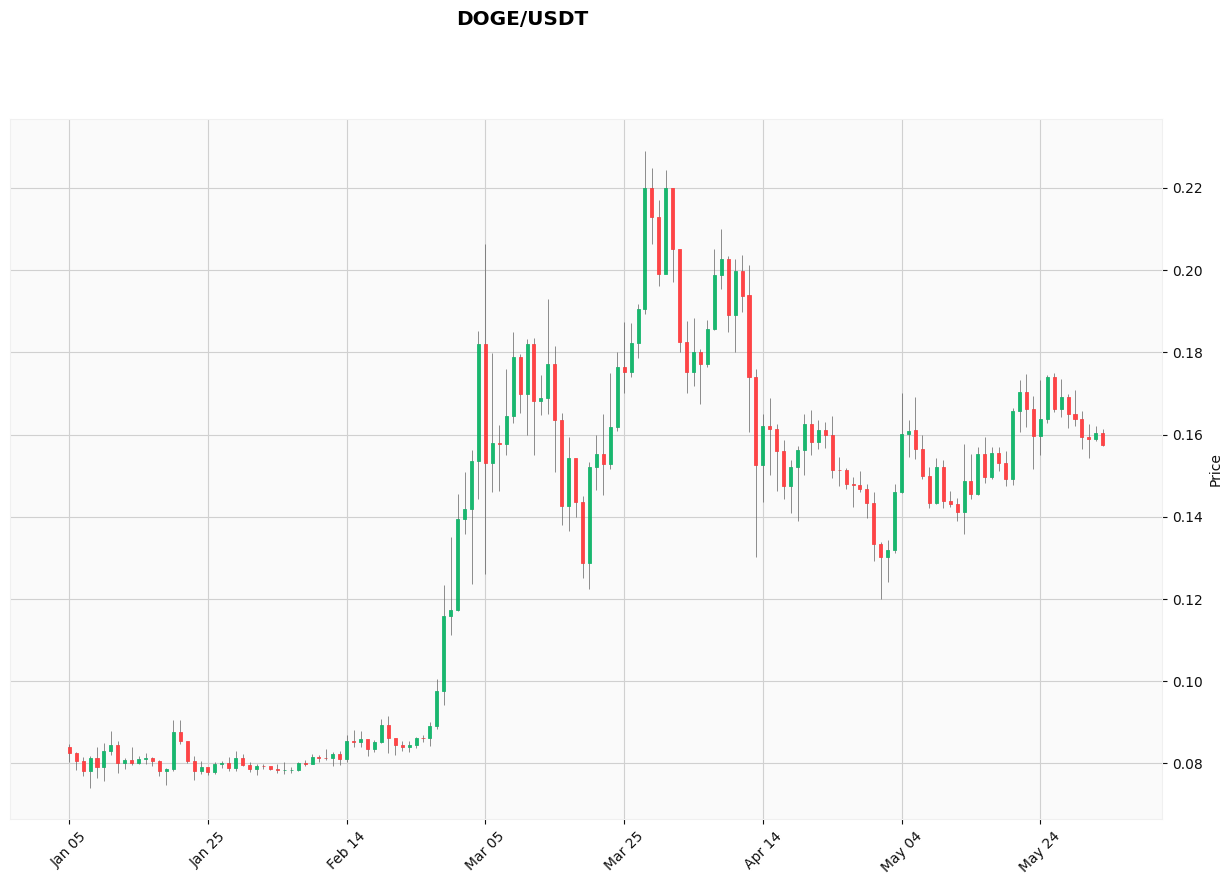

In [22]:
mpf.plot(df.set_index('timestamp'), type='candle', style='yahoo',
             title='DOGE/USDT', ylabel='Price',
             figscale=1.5, figsize=(16, 10))